# Plotting with Seaborn
***

## Introduction

__The various types of Plots in Seaborn are :__

| __Count (Bar) Plot__ | __KDE Plot__ | __Joint (Hex) Plot__ | __Violin Plot__ | 
|-----------|------------|------------|-----------|
| sns.countplot() | sns.kdeplot() | sns.jointplot() | sns.violinplot() |
| Good for nominal and small<br>ordinal categorical data. | Good for interval data. | Good for interval and some<br> nominal categorical data. | Good for interval data and some<br>nominal categorical data. |

In the previous two sections we explored data visualization using the pandas built-in plotting tools. In this section, we'll do the same with __seaborn__.

__seaborn__ is a standalone data visualization package that provides many extremely valuable data visualizations in a single package. It is generally a much more powerful tool than __pandas__; let's see why.

In [9]:
%matplotlib inline
import pandas as pd
reviews = pd.read_csv("../Resources/winemag-data_first150k.csv", index_col=0)
import seaborn as sns
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


<br><br>

## CountPlot 

The pandas bar chart becomes a seaborn __countplot__.

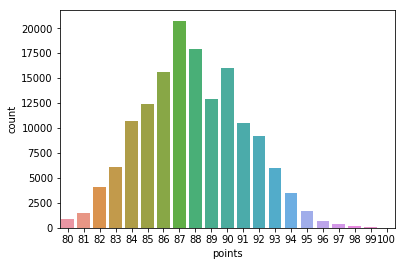

In [4]:
sns.countplot(reviews['points'])

<br>

Comparing this chart with the bar chart from two notebooks ago, we find that, unlike __pandas__, __seaborn__ doesn't require us to shape the data for it via __value_counts__; the __countplot__ (true to its name) aggregates the data for us!

__seaborn__ doesn't have a direct analogue to the line or area chart. Instead, the package provides a __kdeplot__:

<br><br>

## KDE Plot

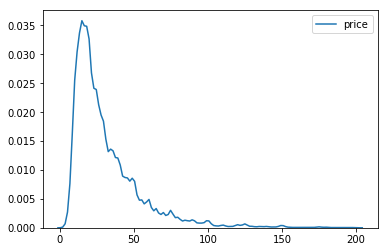

In [5]:
sns.kdeplot(reviews.query('price < 200').price)

<br>

__KDE__, short for __"kernel density estimate"__, is a statistical technique for smoothing out data noise. It addresses an important fundamental weakness of a line chart: it will buff out outlier or "in-betweener" values which would cause a line chart to suddenly dip.

For example, suppose that there was just one wine priced 19.93$, but several hundred prices 20.00$. If we were to plot the value counts in a line chart, our line would dip very suddenly down to 1 and then back up to around 1000 again, creating a strangely "jagged" line. The line chart with the same data, shown below for the purposes of comparison, has exactly this problem!

Note that the x axis in a __seaborn kdeplot__ is the variable being plotted (in this case, price), while the y axis is how often it occurs.

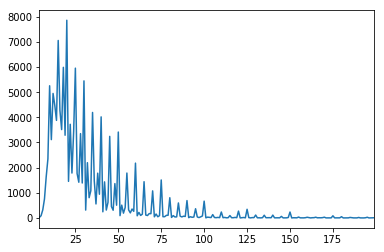

In [6]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

<br>

A __KDE plot__ is better than a line chart for getting the "true shape" of interval data. In fact, I recommend always using it instead of a line chart for such data.

However, it's a worse choice for ordinal categorical data. A KDE plot expects that if there are 200 wine rated 85 and 400 rated 86, then the values in between, like 85.5, should smooth out to somewhere in between (say, 300). However, if the value in between can't occur (wine ratings of 85.5 are not allowed), then the KDE plot is fitting to something that doesn't exist. In these cases, use a line chart instead.

KDE plots can also be used in two dimensions.

/Users/chetan_mac/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


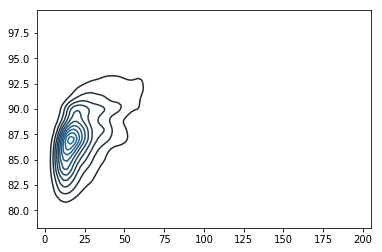

In [7]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

<br>

Bivariate KDE plots like this one are a great alternative to scatter plots and hex plots. They solve the same data overplotting issue that scatter plots suffer from and hex plots address, in a different but similarly visually appealing. However, note that bivariate KDE plots are very computationally intensive. We took a sample of 5000 points in this example to keep compute time reasonable.

<br><br>

## DistPlot

The __seaborn__ equivalent to a pandas __histogram__ is the __distplot__. Here's an example:

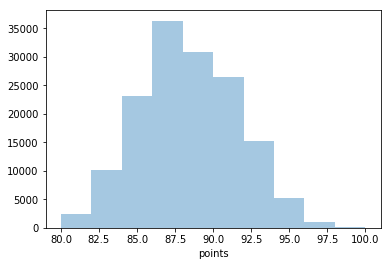

In [15]:
sns.distplot(reviews['points'], bins=10, kde=False)

<br>

The __distplot__ is a composite plot type. In the example above we've turned off the __kde__ that's included by default, and manually set the number of bins to 10 (two possible ratings per bin), to get a clearer picture.

<br><br>

## Scatterplot and Hexplot

To plot two variables against one another in __seaborn__, we use __jointplot__.

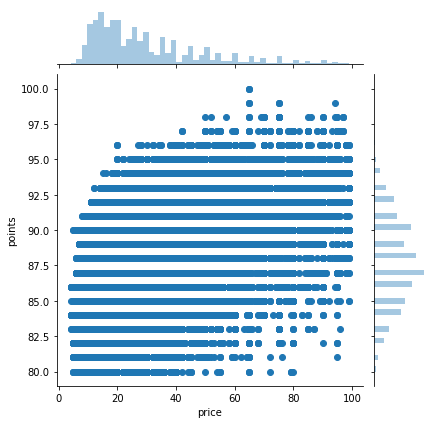

In [16]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

<br>

Notice that this plot comes with some bells and whistles: a correlation coefficient is provided, along with histograms on the sides. These kinds of composite plots are a recurring theme in __seaborn__. Other than that, the __jointplot__ is just like the pandas scatter plot.

As in __pandas__, we can use a hex plot (by simply passing __kind='hex'__) to deal with overplotting:

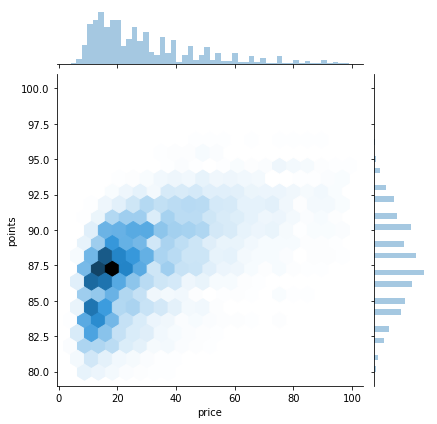

In [17]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', 
              gridsize=20)

<br><br>

## BoxPlot and Violi Plot

__seaborn__ provides a boxplot function. It creates a statistically useful plot that looks like this:

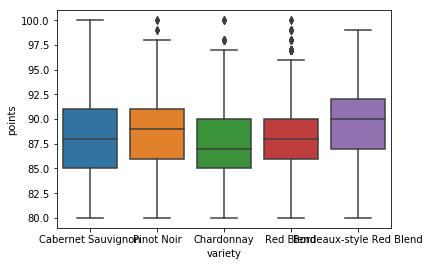

In [18]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]

sns.boxplot(
    x='variety',
    y='points',
    data=df
)

<br>
The center of the distributions shown above is the "box" in boxplot. The top of the box is the 75th percentile, while the bottom is the 25th percentile. In other words, half of the data is distributed within the box! The green line in the middle is the median.

The other part of the plot, the "whiskers", shows the extent of the points beyond the center of the distribution. Individual circles beyond that are outliers.

This boxplot shows us that although all five wines recieve broadly similar ratings, Bordeaux-style wines tend to be rated a little higher than a Chardonnay.

Boxplots are great for summarizing the shape of many datasets. They also don't have a limit in terms of numeracy: you can place as many boxes in the plot as you feel comfortable squeezing onto the page.

However, they only work for interval variables and nominal variables with a large number of possible values; they assume your data is roughly normally distributed (otherwise their design doesn't make much sense); and they don't carry any information about individual values, only treating the distribution as a whole.

I find the slightly more advanced __violinplot__ to be more visually enticing, in most cases:

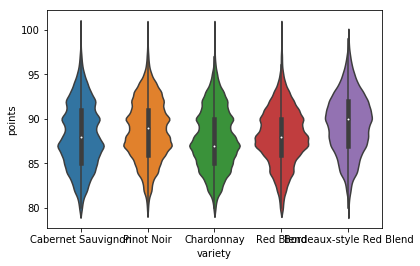

In [19]:
sns.violinplot(
    x='variety',
    y='points',
    data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)]
)

<br>

A __violinplot__ cleverly replaces the box in the boxplot with a kernel density estimate for the data. It shows basically the same data, but is harder to misinterpret and much prettier than the utilitarian boxplot.

<br><br>

## Why *Seaborn*

Having now seen both __pandas__ plotting and the __seaborn__ library in action, we are now in a position to compare the two and decide when to use which for what.

Recall the data we've been working with in this tutorial is in:

In [20]:
reviews.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


<br>
This data is in a "record-oriented" format. Each individual row is a single record (a review); in aggregate, the list of all rows is the list of all records (all reviews). This is the format of choice for the most kinds of data: data corresponding with individual, unit-identifiable "things" ("records"). The majority of the simple data that gets generated is created in this format, and data that isn't can almost always be converted over. This is known as a "tidy data" format.

__seaborn__ is designed to work with this kind of data out-of-the-box, for all of its plot types, with minimal fuss. This makes it an incredibly convenient workbench tool.

__pandas__ is not designed this way. In __pandas__, every plot we generate is tied very directly to the input data. In essence, pandas expects your data being in exactly the right *output* shape, regardless of what the input is.

Hence, in practice, despite its simplicity, the __pandas__ plotting tools are great for the initial stages of exploratory data analytics, but __seaborn__ really becomes your tool of choice once you start doing more sophisticated explorations.

<br><br>

## Examples

As in previous notebooks, let's now test ourselves by answering some questions about the plots we've used in this section. Once you have your answers, click on "Output" button below to show the correct answers.
<br><br>
1. A __seaborn countplot__ is equivalent to what in __pandas__?
<br><br>
2. A __seaborn jointplot__ which is configured with __kind='hex'__ is equivalent to a what in __pandas__?
<br><br>
3. Why might a __kdeplot__ not work very well for ordinal categorical data?
<br><br>
4. What does the __"box"__ in a __boxplot__ represent?
<br><br>

__The answers to above questions are :__

1. A seaborn countplot is like a pandas bar plot.
2. A seaborn jointplot is like a pandas hex plot.
3. KDEPlots work by aggregating data into a smooth curve. This is great for interval data but doesn't always work quite as well for ordinal categorical data.
4. The top of the box is the 75th percentile. The bottom of the box is the 25th percentile. The median, the 50th percentile, is the line in the center of the box. So 50% of the data in the distribution is located within the box!

<br>
Next, try forking this kernel, and see if you can replicate the following plots. To see the answers, click the "Input" button to unhide the code and see the answers. Here's the dataset we've been working with:

In [22]:
pokemon = pd.read_csv("../Resources/Pokemon.csv", index_col=0)
pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


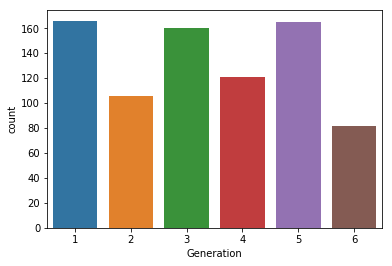

In [23]:
sns.countplot(pokemon['Generation'])

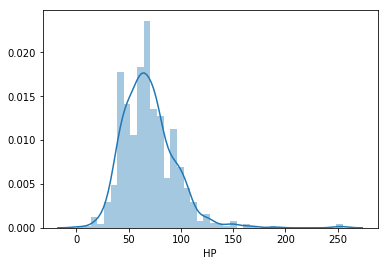

In [24]:
sns.distplot(pokemon['HP'])

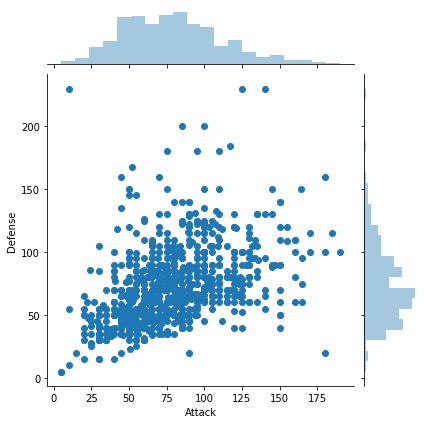

In [25]:
sns.jointplot(x='Attack', y='Defense', data=pokemon)

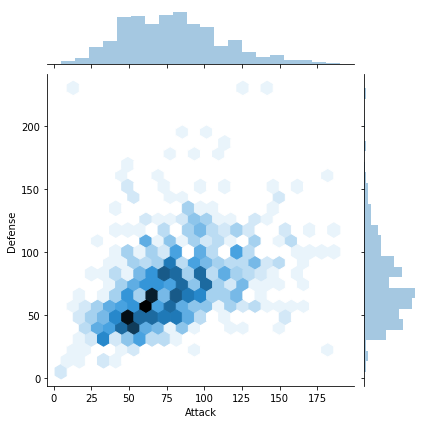

In [26]:
sns.jointplot(x='Attack', y='Defense', data=pokemon, kind='hex')

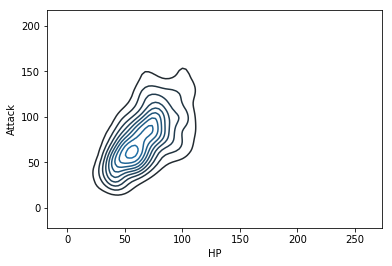

In [27]:
sns.kdeplot(pokemon['HP'], pokemon['Attack'])

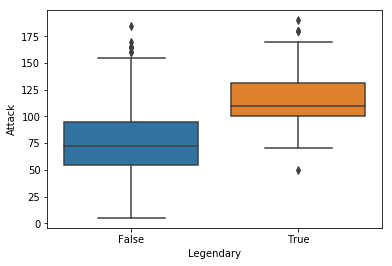

In [28]:
sns.boxplot(x='Legendary', y='Attack', data=pokemon)

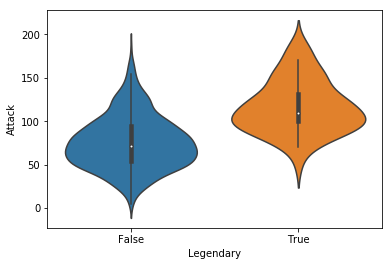

In [29]:
sns.violinplot(x='Legendary', y='Attack', data=pokemon)

<br><br>

## Conclusion

__seaborn__ is one of the most important, if not the most important, data visualization tool in the Python data viz ecosystem. In this notebook we looked at what features and capacities __seaborn__ brings to the table. There's plenty more that you can do with the library that we won't cover here or elsewhere in the tutorial; I highly recommend browsing the terrific __seaborn__ [Gallery](https://seaborn.pydata.org/examples/index.html) page to see more beautiful examples of the library in action.